# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [48]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [3]:
# Your Code Here
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_train.shape)
print("y_test:", x_train.shape)

print("Number of Classes:", len(class_names))

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (50000, 32, 32, 3)
y_test: (50000, 32, 32, 3)
Number of Classes: 100


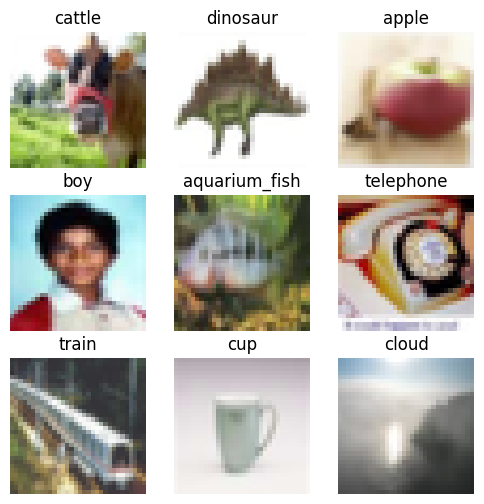

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_images(images, labels):
  plt.figure(figsize=(6, 6))
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title(class_names[y_train[i][0]])
    plt.imshow(x_train[i])
    plt.axis('off')
  plt.show()

plot_images(x_train, y_train)



### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [49]:
from tensorflow.keras.utils import to_categorical

#Def function to normalize pixel values for X data
def normalize_data(x_train, x_test):
  x_train = x_train.astype("float32") / 255.0
  x_test = x_test.astype("float32") / 255.0
  print('Min Pixel data', np.min(x_train))
  print('Max Pixel data', np.max(x_train))
  print('Data Normalized')
  return x_train, x_test

#Def function to categorize class names for y data
def OneHotEncode(y_train, y_test, class_names):
  num_classes = len(class_names)
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)
  print('Class Data One Hot Encoded')
  return y_train, y_test

x_train_normalized, x_test_normalized = normalize_data(x_train, x_test)
y_train_encoded, y_test_encoded = OneHotEncode(y_train, y_test, class_names)

Min Pixel data 0.0
Max Pixel data 1.0
Data Normalized
Class Data One Hot Encoded


In [50]:
#split training data into training and validation
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train_normalized,
    y_train_encoded,
    test_size=0.2,
    random_state=42
)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [32]:
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import TopKCategoricalAccuracy

model = models.Sequential()

# Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# 2nd round of layers
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# 3rd round of layers
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


# Flatten to 1D vector
model.add(layers.Flatten())

# Dense layer
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))

# Dense layer
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.5))

# Output Layer
model.add(layers.Dense(100, activation='softmax'))


model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173,668 (678.39 KB)

 Trainable params: 173,668 (678.39 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical Crossentropy, best choice for multi-class classification
- <b>Optimizer:</b> Adam was the best results I had throughout the labs

In [33]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', TopKCategoricalAccuracy(k=5)])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [34]:
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=(x_val, y_val))


Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0326 - loss: 4.3657 - top_k_categorical_accuracy: 0.1342 - val_accuracy: 0.1128 - val_loss: 3.7826 - val_top_k_categorical_accuracy: 0.3387
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.1234 - loss: 3.7259 - top_k_categorical_accuracy: 0.3529 - val_accuracy: 0.1651 - val_loss: 3.4442 - val_top_k_categorical_accuracy: 0.4470
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1714 - loss: 3.4252 - top_k_categorical_accuracy: 0.4436 - val_accuracy: 0.2140 - val_loss: 3.2154 - val_top_k_categorical_accuracy: 0.5032
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2068 - loss: 3.2353 - top_k_categorical_accuracy: 0.4922 - val_accuracy: 0.2466 - val_loss: 3.1021 - val_top_k_categorical_accuracy: 0.5369
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2351 - loss: 3.0901 - top_k_categorical_accuracy: 0.5295 - val_accuracy: 0.2611 - val_loss: 2.9988

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 38.50%
- <b>Other metric:</b> Top 5 Accuracy (Having the correct result within its top 5 estimates)
- <b>Reason for selection:</b> I read about it and thought it would be a cool one to try to see how close my failed results are getting to the correct answer. It is calculated by finding the number of results with the correct class in its top 5 guesses and dividing by the total number of tests)
- <b>Value of metric:</b> 68.79%
- <b>Interpretation of metric value:</b> This shows me that while my accuracy of 38.5% is low, we're getting a significant amount more "close hits"

In [35]:
test_loss, test_accuracy, test_top_k_accuracy  = model.evaluate(x_test_normalized, y_test_encoded, verbose=2)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Top 5 Accuracy: {test_top_k_accuracy:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.3803 - loss: 2.4064 - top_k_categorical_accuracy: 0.6879
Test Accuracy: 0.3803
Test Top 5 Accuracy: 0.6879


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

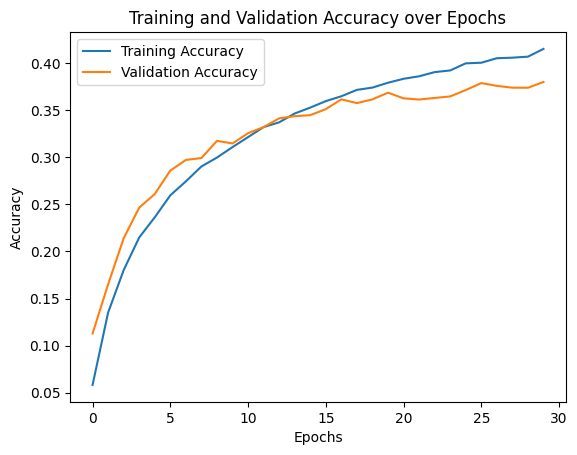

In [36]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It seems like overfitting is a problem in my model, as the training went on the accuracy in validation seems to be less consistant. The model seems to be memorizing the training data as time goes on, even with the dropout I applied.These results do make sense as I scaled the Convolutional layer filters to 128 which achieved better accuracy and top 5 accuracy. However the increase in accuracy seems to be a result of overfitting.

I had been hoping the dropout would help with this but maybe it is not enough dropout and will need to be adjusted. Also possibly 30 epochs is too much? Although I don't think so because even thought the accuracy is less consistently increasing from 20 to 30, it still in general is increasing

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


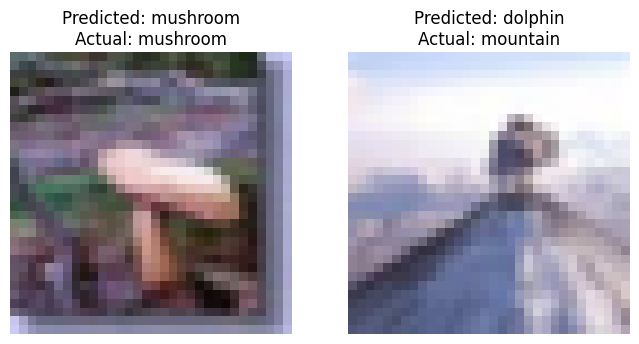

Correct Image Predicted Probabilities: [9.0936177e-05 2.6249243e-03 3.3514849e-03 1.3321246e-03 2.7291575e-03
 3.2016484e-03 3.1393929e-04 3.0994971e-04 1.1117146e-03 7.9857185e-04
 9.0026464e-03 2.5181028e-03 5.1669128e-02 3.0746033e-02 4.5936299e-04
 3.4990329e-03 2.6035556e-04 1.2224693e-04 7.3435409e-03 2.6421661e-03
 4.0494028e-04 2.5411693e-03 3.5309789e-04 2.3223981e-03 1.4839396e-04
 1.5932476e-03 7.7814525e-03 4.4739809e-02 3.4588948e-04 1.0183299e-02
 8.4302691e-04 1.3590974e-03 8.6682504e-03 7.0703924e-03 3.2936928e-03
 4.6642851e-03 1.7631809e-04 7.0022987e-03 7.9143215e-03 6.3633075e-04
 2.7858566e-02 4.7414994e-04 1.0510287e-03 6.0595223e-04 7.9800794e-03
 1.0451905e-02 2.6403343e-02 4.1640946e-04 3.5029696e-04 2.7285917e-03
 6.6962646e-04 3.9396387e-01 1.0766027e-05 1.0749741e-04 2.8362041e-03
 1.1404528e-02 3.2277731e-03 2.2039772e-03 3.8795143e-02 1.5984671e-03
 2.7567337e-04 3.4811595e-04 2.0760315e-04 5.4272497e-04 2.3839190e-03
 1.0599085e-03 4.1623617e-04 6.0940417

In [41]:
y_pred = model.predict(x_test_normalized)

correct_predictions = np.argmax(y_pred, axis=1) == np.argmax(y_test_encoded, axis=1)
incorrect_predictions = np.argmax(y_pred, axis=1) != np.argmax(y_test_encoded, axis=1)

correct_img_idx = np.where(correct_predictions)[0][0]
incorrect_img_idx = np.where(incorrect_predictions)[0][0]

correct_img = x_test[correct_img_idx]
incorrect_img = x_test[incorrect_img_idx]

predicted_correct = class_names[np.argmax(y_pred[correct_img_idx])]
actual_correct = class_names[np.argmax(y_test_encoded[correct_img_idx])]

predicted_incorrect = class_names[np.argmax(y_pred[incorrect_img_idx])]
actual_incorrect = class_names[np.argmax(y_test_encoded[incorrect_img_idx])]

correct_probabilities = y_pred[correct_img_idx]
incorrect_probabilities = y_pred[incorrect_img_idx]

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_test_normalized[correct_idx])
plt.title(f"Predicted: {predicted_correct}\nActual: {actual_correct}")
plt.axis('off')  # Remove axis for better viewing

# Plot the incorrect prediction
plt.subplot(1, 2, 2)
plt.imshow(x_test_normalized[incorrect_idx])
plt.title(f"Predicted: {predicted_incorrect}\nActual: {actual_incorrect}")
plt.axis('off')  # Remove axis

plt.show()

# Report classification probabilities for each
print(f"Correct Image Predicted Probabilities: {correct_probabilities}")
print(f"Incorrect Image Predicted Probabilities: {incorrect_probabilities}")

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [96]:
from tensorflow.keras import regularizers

model = models.Sequential()

# Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_regularizer=regularizers.l2(0.0001)))

# 2nd round of layers
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

# 3rd round of layers
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

#4th round of layers
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))


# Flatten to 1D vector
model.add(layers.Flatten())

# Dense layer
model.add(layers.Dense(128, activation='relu'))

# Dense layer
model.add(layers.Dense(64, activation='relu'))

# Output Layer
model.add(layers.Dense(100, activation='softmax'))


model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_76 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_67 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_68 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_69 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 534,372 (2.04 MB)

 Trainable params: 534,372 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

I decided to add L2 Regularization which we have learned in previous modules in the course. My model was clearly overfitted as seen before even with the dropout so I wanted to add a penalty to the weights of each feature so that the model would not become too dependant on the training data and memorize classes based on that.

Edit 1: I am also going to add early stopping in the training data as I am continuously seeing epochs with very little progression near the end of my model fitting and I don't want to overtrain the data.

Edit 2: After lots of trial and error with a wide variety of results I am going to add learning rate scheduling as well to make sure the overfitting doesnt get worse as the accuracy increases

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [97]:
# Compile the model

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
Early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', TopKCategoricalAccuracy(k=5)])

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[Early_stopping, lr_scheduler]
    )

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.0277 - loss: 4.4176 - top_k_categorical_accuracy: 0.1114 - val_accuracy: 0.0965 - val_loss: 3.8812 - val_top_k_categorical_accuracy: 0.3006 - learning_rate: 0.0010
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.1037 - loss: 3.8188 - top_k_categorical_accuracy: 0.3219 - val_accuracy: 0.1537 - val_loss: 3.5073 - val_top_k_categorical_accuracy: 0.4333 - learning_rate: 0.0010
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1600 - loss: 3.4918 - top_k_categorical_accuracy: 0.4206 - val_accuracy: 0.2017 - val_loss: 3.2692 - val_top_k_categorical_accuracy: 0.4888 - learning_rate: 0.0010
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2007 - loss: 3.2813 - top_k_categorical_accuracy: 0.4790 - val_accuracy: 0.2288 - val_loss: 3.0959 - val_top_k_categorical_accuracy: 0.5388 - learning_rate: 0.0010
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.

In [98]:
test_loss, test_accuracy, test_top_k_accuracy  = model.evaluate(x_test_normalized, y_test_encoded, verbose=2)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Top 5 Accuracy: {test_top_k_accuracy:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.4153 - loss: 2.3234 - top_k_categorical_accuracy: 0.7094
Test Accuracy: 0.4153
Test Top 5 Accuracy: 0.7094


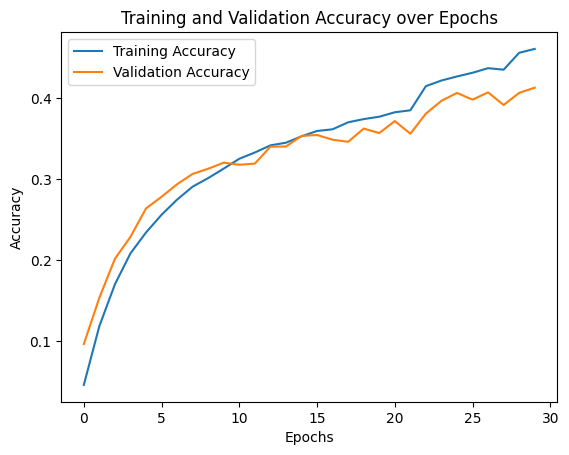

In [100]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


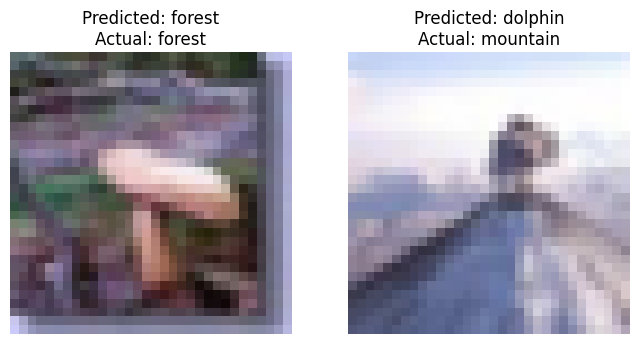

Correct Image Predicted Probabilities: [7.27968485e-09 3.42917541e-04 2.26675620e-04 1.39404694e-03
 1.74762439e-02 1.79677227e-04 2.18859190e-04 1.54376787e-04
 8.61115754e-03 2.06661512e-04 9.09091614e-05 1.81797281e-04
 1.39752915e-03 5.81427912e-06 1.42943842e-04 4.44788951e-04
 2.56150524e-05 1.49849372e-03 6.98444713e-03 7.42004893e-04
 1.32763225e-05 6.79942896e-04 6.34596290e-05 8.34248494e-05
 4.22896937e-06 4.44720645e-04 1.53884140e-03 1.25288144e-02
 1.80227489e-05 4.50172694e-03 9.38570884e-04 6.28147181e-03
 5.31479437e-03 2.18583778e-01 2.57715536e-03 1.20647637e-04
 6.25898945e-04 8.56530212e-04 5.67800365e-02 9.86784289e-05
 4.25897679e-06 6.84131053e-04 3.96687388e-02 1.06461579e-03
 6.62559969e-03 7.44726323e-03 3.91906760e-05 2.96693295e-03
 1.70940220e-05 1.14874718e-04 1.77712347e-02 7.97416607e-04
 2.59138207e-04 1.32205074e-08 4.50638145e-05 5.80070354e-03
 1.73648819e-02 4.85169876e-05 1.15869227e-06 4.83923033e-02
 1.33629801e-05 9.53760355e-06 3.27015272e-07 

In [101]:
y_pred = model.predict(x_test_normalized)

correct_predictions = np.argmax(y_pred, axis=1) == np.argmax(y_test_encoded, axis=1)
incorrect_predictions = np.argmax(y_pred, axis=1) != np.argmax(y_test_encoded, axis=1)

correct_img_idx = np.where(correct_predictions)[0][0]
incorrect_img_idx = np.where(incorrect_predictions)[0][0]

correct_img = x_test[correct_img_idx]
incorrect_img = x_test[incorrect_img_idx]

predicted_correct = class_names[np.argmax(y_pred[correct_img_idx])]
actual_correct = class_names[np.argmax(y_test_encoded[correct_img_idx])]

predicted_incorrect = class_names[np.argmax(y_pred[incorrect_img_idx])]
actual_incorrect = class_names[np.argmax(y_test_encoded[incorrect_img_idx])]

correct_probabilities = y_pred[correct_img_idx]
incorrect_probabilities = y_pred[incorrect_img_idx]

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_test_normalized[correct_idx])
plt.title(f"Predicted: {predicted_correct}\nActual: {actual_correct}")
plt.axis('off')  # Remove axis for better viewing

# Plot the incorrect prediction
plt.subplot(1, 2, 2)
plt.imshow(x_test_normalized[incorrect_idx])
plt.title(f"Predicted: {predicted_incorrect}\nActual: {actual_incorrect}")
plt.axis('off')  # Remove axis

plt.show()

# Report classification probabilities for each
print(f"Correct Image Predicted Probabilities: {correct_probabilities}")
print(f"Incorrect Image Predicted Probabilities: {incorrect_probabilities}")

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

After a wide variety of tests and tweaking features like dropout, regularization, learning rate, early stopping, number of convolutional layers and size of filters I don't seem to be able to increase my accuracy much higher.

After adding the regularization of 0.01 it was way too much of a penalty and my model was barely improving. I tried lowering the dropout and that did not work as well. I lowered the regularization of 0.001 but it still made the model worse. Only when I added 0.0001 on the convolutional layers did I see a slight increase from the original model. I added learning rate scheduling as I saw less consistent accuracy near the end of the results which did help me and allow me to get my accuracy to reach 41%.

Definitely room for improvement as my accuracy was all over the place my top 5 accuracy stayed relatively consistent throughout so I was not far off with my misses.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.